# Tuning MCTS params to support policy training

We are using the Upper Confidence Bound for MCTS

$$
U(s, a) = Q(s, a) + c_{puct} P(s, a) \frac{\sqrt{\sum_b N(s, b)}}{1 + N(s, a)}
$$

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from tqdm import tqdm

from aegomoku.gomoku_board import GomokuBoard
from aegomoku.gomoku_game import ConstantBoardInitializer, GomokuGame as Game
from aegomoku.interfaces import MctsParams, PolicyAdviser, PolicyParams
from aegomoku.mcts import MCTS
from aegomoku.gomoku_players import PolicyAdvisedGraphSearchPlayer
from aegomoku.policies.topological_value import TopologicalValuePolicy
from aegomoku.utils import analyse_board

2022-10-25 18:49:55.106059: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
BOARD_SIZE=15


---
### The initial board

In [10]:
# Yixin says: This is a 100% win for white - I guess we're not quite there, yet...;-(
# stones = "C11F9E9G8F7G7G9H8"
stones = "C11F9E9G8F7G7G9H8I8H7I6I9F6H6H9I5J4"
# stones = "H8G8"
# stones = [256, 276, 238, 240, 219, 237, 184, 199]

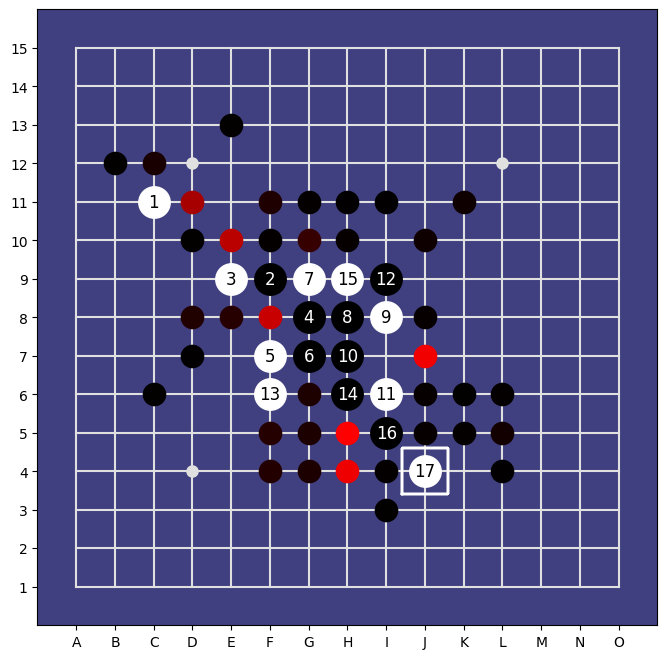

In [12]:
policy = TopologicalValuePolicy(kappa_s=6, kappa_d=5, board_size=BOARD_SIZE)

analyse_board(BOARD_SIZE, stones, policy, disp_width=8, policy_cutoff=.01)

In [ ]:
"H4H5

In [ ]:
the_game = Game(BOARD_SIZE, initializer=ConstantBoardInitializer(''))

In [ ]:
mcts_params = MctsParams(cpuct=1.0, num_simulations=400, temperature=1.0)
policy_params = PolicyParams(model_file_name=None, advice_cutoff=.01)
advisor = PolicyAdviser(model=policy, params = policy_params)
player = PolicyAdvisedGraphSearchPlayer("Tester", the_game, mcts_params, adviser=advisor)

In [ ]:
board = GomokuBoard(BOARD_SIZE, stones)

---

# Essential Parameter: MCTS score read-out temperature
A readout temperature between 4 and 6 will produce a reasonable input for future advice!

In [ ]:
print("Policy with decreasing readout temperatur")
player.refresh()
player.mcts.get_action_prob(board)
for t in tqdm(range(10, -1, -2)):
    probs, v = player.evaluate(board, t)
    analyse_board(BOARD_SIZE, stones, probs, disp_width=6, policy_cutoff=.01)

In [ ]:
probs, _ = player.evaluate(board, 6)
print((np.reshape(probs, (BOARD_SIZE, BOARD_SIZE)) * 99 / np.max(probs)).astype(int))